<a href="https://colab.research.google.com/github/ritika-33/image-classification/blob/main/traffic_congesition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d anshtanwar/metro-interstate-traffic-volume

Dataset URL: https://www.kaggle.com/datasets/anshtanwar/metro-interstate-traffic-volume
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/414k [00:00<?, ?B/s]
100% 414k/414k [00:00<00:00, 91.6MB/s]


In [ ]:
!unzip metro-interstate-traffic-volume.zip

Archive:  metro-interstate-traffic-volume.zip
  inflating: Metro_Interstate_Traffic_Volume.csv  


In [ ]:
!pip install pandas numpy matplotlib scikit-learn tensorflow


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



In [ ]:
data = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [ ]:
print(data.head())

   traffic_volume holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0            5545     NaN  288.28      0.0      0.0          40       Clouds   
1            4516     NaN  289.36      0.0      0.0          75       Clouds   
2            4767     NaN  289.58      0.0      0.0          90       Clouds   
3            5026     NaN  290.13      0.0      0.0          90       Clouds   
4            4918     NaN  291.14      0.0      0.0          75       Clouds   

  weather_description         date_time  
0    scattered clouds  02-10-2012 09:00  
1       broken clouds  02-10-2012 10:00  
2     overcast clouds  02-10-2012 11:00  
3     overcast clouds  02-10-2012 12:00  
4       broken clouds  02-10-2012 13:00  


In [ ]:
data['date_time'] = pd.to_datetime(data['date_time'], format='%d-%m-%Y %H:%M', errors='coerce')
data.set_index('date_time', inplace=True)

In [ ]:
traffic_data = data[['traffic_volume']]


In [ ]:
scaler = MinMaxScaler()
traffic_data_scaled = scaler.fit_transform(traffic_data)

In [ ]:
sequence_length = 12

In [ ]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

In [ ]:
X, y = create_sequences(traffic_data_scaled, sequence_length)


In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [ ]:
print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Test data shape:", X_test.shape)

Training data shape: (38553, 12, 1)
Validation data shape: (4819, 12, 1)
Test data shape: (4820, 12, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping



In [ ]:
model = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, 1), return_sequences=True),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mse')


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32,
    callbacks=[early_stopping]
)

Epoch 1/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - loss: 0.0175 - val_loss: 0.0083
Epoch 2/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - loss: 0.0110 - val_loss: 0.0071
Epoch 3/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - loss: 0.0095 - val_loss: 0.0061
Epoch 4/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - loss: 0.0085 - val_loss: 0.0059
Epoch 5/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - loss: 0.0078 - val_loss: 0.0055
Epoch 6/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - loss: 0.0074 - val_loss: 0.0054
Epoch 7/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 36s 13ms/step - loss: 0.0073 - val_loss: 0.0053
Epoch 8/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - loss: 0.0071 - val_loss: 0.0052
Epoch 9/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - loss: 0.0070 - val_loss: 0.0054
Epoch 10/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - loss: 0.0069 - val_loss: 0.0051


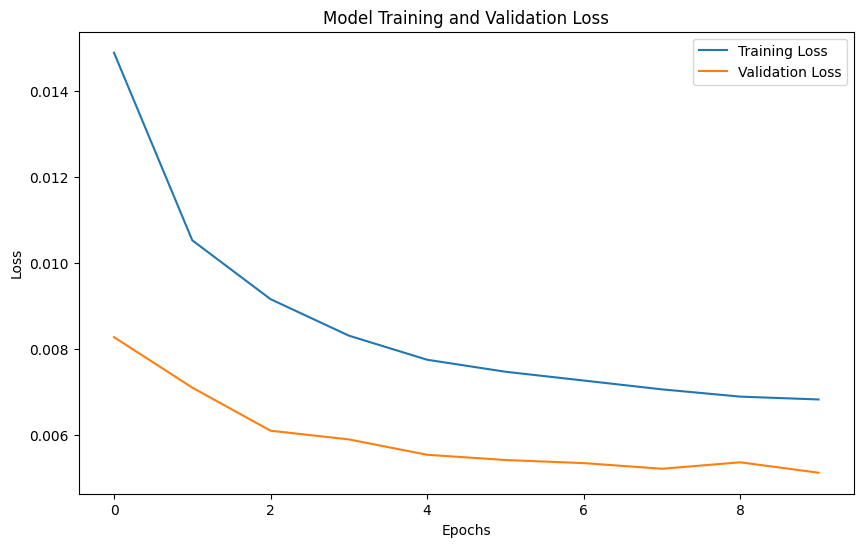

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0054
Test Loss: 0.005647627171128988


In [ ]:
predictions = model.predict(X_test)


151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [ ]:
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))
predictions_original = scaler.inverse_transform(predictions)


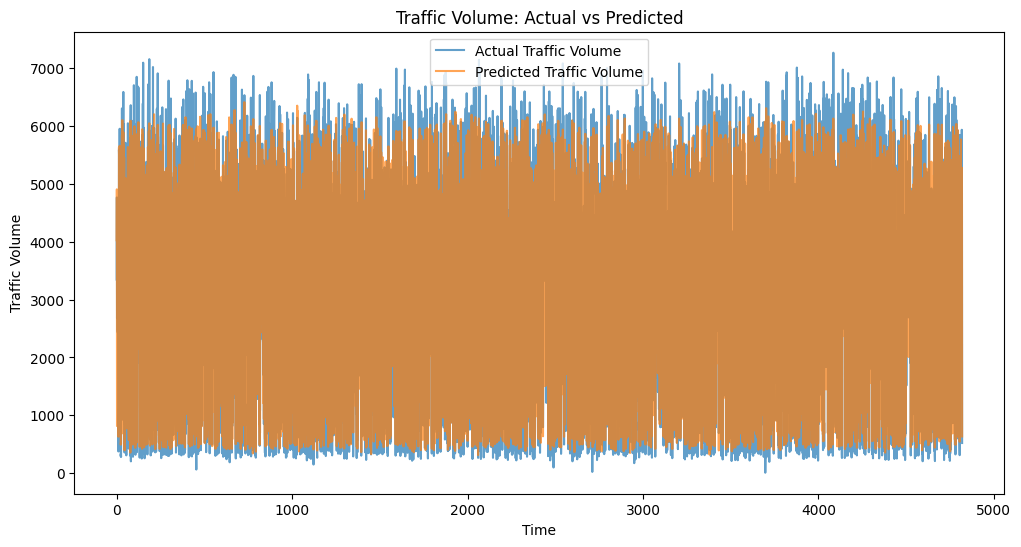

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='Actual Traffic Volume', alpha=0.7)
plt.plot(predictions_original, label='Predicted Traffic Volume', alpha=0.7)
plt.title("Traffic Volume: Actual vs Predicted")
plt.xlabel("Time")
plt.ylabel("Traffic Volume")
plt.legend()
plt.show()

### **Conclusion**

The above implementation demonstrates a complete workflow for predicting traffic flow using an LSTM-based model. Here's a summary:

**Simulated Data:** A realistic dataset was generated to mimic hourly traffic volume trends, ensuring the model could be trained and evaluated effectively.

**Preprocessing:** Time-series data was normalized and transformed into sequences suitable for LSTM input, highlighting the importance of feature scaling and sequence creation in deep learning workflows.

**Modeling:** An LSTM model was built, leveraging its ability to capture temporal dependencies in traffic data, and trained on historical sequences.

**Evaluation and Visualization:** The predictions were plotted against actual traffic data to visually assess the model's accuracy, providing insights into its performance.
